## 8.0 서론

이번 장에서느 레드와인과 화이트 와인을 분류하는 문제를 다뤄보려고 한다. 우리 책은 머신러닝 관련 책은 아니지만 머신러닝은 이제 일반화 되어서 이 정도 내용은 오히려 상식선에서 익혀두는 것도 좋을 것으로 생각한다.

이번 데이터는 미리 경로에서 각각 받아서 우리가 학습할 수 있도록 별도로 편집해서 필자의 github에 미리 저장해 두었다.  
 * https://archive.ics.uci.edu/dataset/186/wine+quality  
우리는 이번에는 다음의 데이터를 가지고 접근하도록 하겠다.
 * 이번 데이터 경로 : https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv


## 8.1 데이터 받기

In [1]:
#In [1]
import pandas as pd
wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, sep=',', index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


pandas는 데이터가 웹에 있을 때 웹 주소만 가지고도 데이터를 읽어올 수 있다. 와인 데이터는 화학 성분으로 되어 있으며, color 칼럼에는 레드 와인(1), 화이트 와인(0)으로 구분되어 있다.  
각 칼럼의 의미는 아래와 같다.  

- fixed acidity: 고정 산도
- citric acid: 시트르산
- chlorides: 염화물
- total sulfur dioxide: 총 이산화황
- pH: 산성도
- alcohol: 알코올
- volatile acidity: 휘발성 산도
- residual sugar: 잔류 당분
- free sulfur dioxide: 자유 이산화황
- density: 밀도
- sulphates: 황산염
- quality: 0~10(높을수록 좋은 품질)

In [2]:
#In [2]
wine['color'].value_counts()

0    4898
1    1599
Name: color, dtype: int64

화이트 와인이 레드 와인보다 대략 세 배 정도 많다.

## 8.2 학습용 데이터 만들기

In [3]:
#In [3]
y = wine['color']
X = wine.drop(['color'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


레드/화이트 와인을 구분하는 것이 목표이므로 color 칼럼은 y라는 변수에, 나머지는 X라는 변수에 저장해 두겠다.

In [4]:
#In [4]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

그리고, 20%로 테스트 데이터와 훈련용 데이터를 분리하도록 하겠다. 이 의미는 X_train과 y_train으로 학습하고, 학습 완료된 모델에 X_test 데이터로 예측해서 y_test와 비교하겠다는 뜻이다.

In [5]:
#In [5]
import numpy as np
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([3913, 1284], dtype=int64))

y_train 변수에 numpy가 제공하는 unique 함수를 적용해보면 적절히 화이트/레드 와인이 잘 섞여있는 것을 확인할 수 있다.

## 8.3 로지스틱 회귀로 학습하기

In [6]:
#In [6]
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=13, solver='liblinear', C=10.)
log_reg.fit(X_train, y_train)

LogisticRegression(C=10.0, random_state=13, solver='liblinear')

이번에는 로지스틱 회귀라고 하는 모델을 사용해보려고 한다. 로지스틱 회귀는 선형회귀 모델의 마지막 단에 sigmoid 함수를 사용한 것인데, 지금은 로지스틱 회귀를 한 번 사용해보겠다. (개념은 나중에)  
sklearn에서 linear_model의 LogisticRegression을 불러와서 X_train, y_train으로 학습시키면 된다.

In [7]:
#In [7]
from sklearn.metrics import accuracy_score

pred = log_reg.predict(X_train)
accuracy_score(y_train, pred)

0.98691552818934

sklearn.metrics가 제공하는 accuracy_score를 불러서 X_train 데이터로 예측시켜서 y_train과 비교하면  98.7%의 정확도가 나타난다.

In [8]:
#In [8]
pred = log_reg.predict(X_test)
accuracy_score(y_test, pred)

0.9876923076923076

이번에는 우리의 예측 모델을 테스트하기 위해 따로 빼둔 X_test 데이터를 predict해서 정답(y_test)과 비교해 보면 98.8%의 정확도가 보인다. 레드 와인과 화이트 와인은 분류가 쉽게 된다.

In [9]:
#In [9]
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[980,   5],
       [ 11, 304]], dtype=int64)

Confusion_matrix는 분류 문제에서 어떻게 데이터가 예측과 오류가 있는지 확인할 수 있다. 위 결과의 첫 줄은 화이트 와인(0)을 화이트 와인으로 분류한 것이 980개, 레드 와인으로 분류한 것이 5개라는 뜻이다. 그 아랫줄은 레드 와인(1)을 화이트 와인으로 잘못 분류한 것이 11개, 레드 와인으로 잘 분류한 것이 304개라는 뜻이다.

## 8.4 데이터 정규화

<AxesSubplot:>

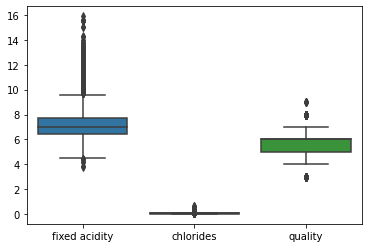

In [10]:
#In [10]
import seaborn as sns

sns.boxplot(data=X[['fixed acidity', 'chlorides', 'quality']])

이번에는 seaborn에서 boxplot을 이용해서 ['fixed acidity', 'chlorides', 'quality'] 이 데이터만 그려 보았다. 위 결과를 보면 세 개의 특성이 평균도 데이터가 분포하는 폭도 다르다는 것을 알 수 있다. 이럴 때 학습의 결과가 나쁠 수 있다. 이를 더 잘 학습하기 위해 조금 다른 작업을 하는 경우가 있다.

In [11]:
#In [11]
from sklearn.preprocessing import MinMaxScaler, StandardScaler
MMS = MinMaxScaler()
SS = StandardScaler()

SS.fit(X)
MMS.fit(X)

X_ss = SS.transform(X)
X_mms = MMS.transform(X)

바로 정규화라고 하는 작업이다. 이 중에서 sklearn은 MinMaxScaler, StandardScaler 두 방법을 제공한다. 두 방법의 차이는 다시 그래프로 보여주겠지만 MinMaxScaler는 데이터를 0과 1로 강제로 다시 매핑하는 것이다. StandardScaler는 평균을 0으로 표준편차를 1로 바꾸는 작업을 한다.

In [12]:
#In [12]
X_ss_pd  = pd.DataFrame(X_ss, columns=X.columns)
X_mms_pd  = pd.DataFrame(X_mms, columns=X.columns)

각각의 데이터를 다시 pandas의 DataFrame으로 표현한다.

In [13]:
#In [13]
X_ss_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230


In [14]:
#In [14]
X_mms_pd.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333


데이터를 pandas로 표현해서 앞선 boxplot으로 그 결과를 비교하려 한다.

<AxesSubplot:>

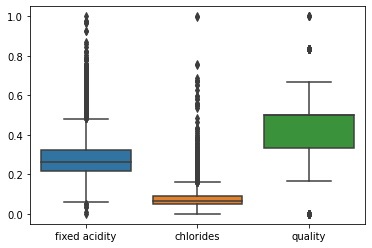

In [15]:
#In [15]
sns.boxplot(data=X_mms_pd[['fixed acidity', 'chlorides', 'quality']])

MixMaxScaler는 모든 데이터를 0과 1사이에 위치시키는 것으로 그 안에서 평균은 서로 다르다.

<AxesSubplot:>

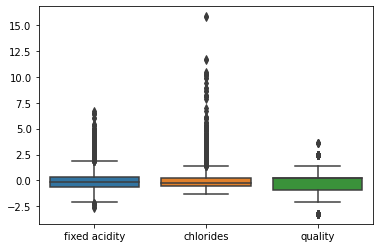

In [16]:
#In [16]
sns.boxplot(data=X_ss_pd[['fixed acidity', 'chlorides', 'quality']])

그에 반해 StandardScaler는 위 결과에서 보이듯이 평균을 0으로 표준편차를 1로 만들어서 보여주는 것이다.